Данные были взяты из следующего источника: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

#### Описание переменных: 

- Винодельня (в какой конкретно винодельне был собран виноград и произведено само вино) \t
- Название вина (марка и 
- Год сбора винограда
- Рейтинг вина
- Количество отзывов
- Страна сбора (однако далее она была дропнута, так как рассматриваются вина исключительно из Испании) 
- Регион производства 
- Цена (в евро) 
- Тип вина (ну как с пивом - IPA, PILSNER, Weitzen и т.д.) 
- Оценка насыщенности (подразумевается богатство и тяжесть вина во рту) 
- Кислотность (параметр, определяющий ощущение кислотности вина) 

## Часть 1: Сбор и предварительная обработка данных

Импортируем базовые библиотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [2]:
df = pd.read_csv('wines_SPA.csv') # Считываем датасет.
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.info() # Ищем нулевые значения в колонках датасета, смотрим на типы данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df['year'].unique() # Смотрим на проблемы с уникальными значениями year 

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [5]:
df['year'].fillna(int(df['year'].mode()), inplace = True) # Заполнили отсутствующие годы модой. Не использовали 
# медиану, так как нам важно было, чтобы мода не изменилась вследствие таких преобразований.

In [6]:
df = df.replace('N.V.', int(df['year'].mode())) # Заполнили отсутствующие годы модой. Не использовали медиану, так как нам 
# важно было, чтобы мода не изменилась вследствие таких преобразований

In [7]:
df = df.astype({'year': 'int'}) # Переводим переменную "year" из object в int для последующего построения графиков. 

In [8]:
df = df.astype({'price': 'int'}) # Переводим цены в int.

In [9]:
df.drop(columns = 'country', inplace = True)

In [10]:
df.info() # Смотрим на данные после изменений. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   int64  
 7   type         6955 non-null   object 
 8   body         6331 non-null   float64
 9   acidity      6331 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 586.1+ KB


In [11]:
df['body'] = df['body'].fillna(df['body'].median()) # Заполнили отсутсвующие body медианой

df['acidity'] = df['acidity'].fillna(df['acidity'].median()) # Заполнили отсутствующие acidity медианой

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   int64  
 7   type         6955 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 586.1+ KB


In [13]:
df['type'] = df['type'].fillna(df['type'].mode()[0]) # Заменяем на моду тип вина. 

In [14]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778,Ribera Del Duero Red,5.0,3.0


## Часть 3. Создание нового признака

In [15]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Получаем координаты первой половины регионов

lt = (df['region'].unique())[:43]
from geopy.geocoders  import Nominatim

def get_coordinates(place): # Функция для получения координат места place
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(place)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

places = lt
coordinates = {}
for place in places:
    coords = get_coordinates(place)
    if coords:
        coordinates[place] = coords

print(coordinates)

{'Toro': [41.5216963, -5.3939824], 'Vino de Espana': [42.1771554, -8.4341104], 'Ribera del Duero': [41.6591121, -3.6815871170201557], 'Montilla-Moriles': [36.7286168, -4.3001727], 'Jumilla': [38.4735408, -1.3285417], 'Jerez-Xeres-Sherry': [36.65901315, -6.155439431926194], 'Priorato': [44.8741121, 10.1628956], 'Rioja': [42.2814642, -2.482804975070473], 'Bierzo': [42.65265025, -6.62318404217132], 'Castilla y Leon': [41.8037172, -4.7471726], 'Campo de Borja': [41.78654145, -1.5058322706803928], 'Cadiz': [36.5297438, -6.2928976], 'Cava': [42.31658175, 1.6111496867672197], 'Jerez Palo Cortado': [36.6954668, -6.1474169], 'Manzanilla': [37.3887479, -6.4316237], 'Valdeorras': [42.34834155, -6.9659982204038755], 'Emporda': [42.1893929, 3.077661284375413], 'Rioja Alta': [42.4157318, -2.87947386168831], 'Alicante': [38.3436365, -0.4881708], 'Somontano': [42.0883878, 0.09940412890672314], 'Ribeiro': [42.31990645, -8.152266856014716], 'Mallorca': [39.613432, 2.8829184529439633], 'Yecla': [38.61365

In [17]:
# Получаем координаты второй половины регионов

lt_2 = (df['region'].unique())[44:]

def get_coordinates_2(place): # Функция для получения координат места place
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(place)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

places = lt_2
coordinates_2 = {}
for place in places:
    coords = get_coordinates_2(place)
    if coords:
        coordinates_2[place] = coords

print(coordinates_2)

coordinates.update(coordinates_2)

{'Almansa': [38.8682065, -1.0978627], 'Valencia': [39.4697065, -0.3763353], 'Sierras de Malaga': [36.9218381, -4.0957668], 'Ribeira Sacra': [43.3244212, -8.4438723], 'El Terrerazo': [39.6222682, -1.2467301], 'Jerez Oloroso': [36.6945822, -6.1469034], 'Castilla': [-15.5859786, -72.3617354], 'Alella': [41.4952867, 2.2942758], 'Pla i Llevant': [39.3805494, -0.4485192], 'Pla de Bages': [41.7785429, 1.8904077], 'Pago Calzadilla': [40.1417164, -2.6540184], 'Andalucia': [37.3399964, -4.5811614], 'Monterrei': [25.6802019, -100.315258], 'Aragon': [41.3787291, -0.7639373], 'Galicia': [42.61946, -7.863112], 'La Palma': [28.6552318, -17.857322574449967], 'Binissalem-Mallorca': [39.6002717, 2.6720865], 'Calatayud': [41.3527628, -1.6422977], 'Arinzano': [42.630781, -1.9934938], 'Tarragona': [41.1172364, 1.2546057], 'Extremadura': [39.1748426, -6.1529891], 'Murcia': [37.9923795, -1.1305431], 'La Mancha': [28.1030168, -107.7577853], 'Otazu': [42.8317497, -2.6275294], 'Valdejalon': [41.5381269, -1.3088

In [18]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Выводим на карту всех регионов. К сожалению некоторые точки улетают в другие страны, так как там есть 
# одноименные названия, но это единичные случаи, которые не сильно влияют на картинку

import folium

map_spain = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles='Stamen Toner')

regions = coordinates
color_regions = coordinates

for region, coords in regions.items():
    color = 'red' if region in color_regions else 'white'
    folium.Marker(location=coords, tooltip=region, icon=folium.Icon(color=color)).add_to(map_spain)

map_spain

## Часть 3. Создание нового признака

In [20]:
# Получили регионы, которые находятся к северу от Мадрида

north = []
lll = list(coordinates)
for i in range(71):
    place = lll[i]
    latitude = coordinates[place][0]
    if latitude > coordinates['Madrid'][0]:
        north.append(place)
north[:5]

['Toro', 'Vino de Espana', 'Ribera del Duero', 'Priorato', 'Rioja']

In [21]:
# Добавил новый столбик нулей в основную таблицу

zeros = pd.DataFrame(np.zeros(7500))
df = df.join(zeros)

In [22]:
# Заменил у северных регионов нули на единици в столбике N/S (north, south)

df = df.rename(columns = {0: 'N/S'})
df.loc[df['region'] . isin(north), 'N/S'] = 1
df = df.fillna(0)

In [23]:
# Нашел координаты северных регионов

lt_3 = north

def get_coordinates_3(place): # Функция для получения координат места place
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(place)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

places = lt_3
coordinates_3 = {}
for place in places:
    coords = get_coordinates_3(place)
    if coords:
        coordinates_3[place] = coords

print(coordinates_3)

{'Toro': [41.5216963, -5.3939824], 'Vino de Espana': [42.1771554, -8.4341104], 'Ribera del Duero': [41.6591121, -3.6815871170201557], 'Priorato': [44.8741121, 10.1628956], 'Rioja': [42.2814642, -2.482804975070473], 'Bierzo': [42.65265025, -6.62318404217132], 'Castilla y Leon': [41.8037172, -4.7471726], 'Campo de Borja': [41.78654145, -1.5058322706803928], 'Cava': [42.31658175, 1.6111496867672197], 'Valdeorras': [42.34834155, -6.9659982204038755], 'Emporda': [42.1893929, 3.077661284375413], 'Rioja Alta': [42.4157318, -2.87947386168831], 'Somontano': [42.0883878, 0.09940412890672314], 'Ribeiro': [42.31990645, -8.152266856014716], 'Cigales': [41.7582863, -4.6989785], 'Navarra': [42.61254875, -1.830787673361753], 'Rioja Alavesa': [42.54415095, -2.5454223587321856], 'Costers del Segre': [41.502298249999996, 0.8273990115524253], 'Sardon de Duero': [41.6085193, -4.4339323], 'Cataluna': [41.8523094, 1.5745043], 'Rueda': [41.4129785, -4.9597533], 'Montsant': [41.116962, 1.2110984], 'Conca de Ba

In [50]:
# Вывел синим цветом "северные" регионы и оранжевым "южные"

map_spain = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles='Stamen Toner')

regions = coordinates
color_regions = coordinates_3

for region, coords in regions.items():
    color = 'darkblue' if region in color_regions else 'orange'
    folium.Marker(location=coords, tooltip=region, icon=folium.Icon(color=color)).add_to(map_spain)

map_spain

## Часть 4. Гипотезы


### Проверка соответствия распределения стоимости вина экспоненциальному закону

$$
\begin{aligned}
& H_0: Распределение \ стоимости \ вина \ соответствует\ экспоненциальному \ закону \\
& H_1: Распределение \ стоимости \ вина \ не \ соответствует \ экспоненциальному \ закону
\end{aligned}
$$

В данном случае стоит воспользоваться критерием Колмогорова, так как мы проверяем гипотезу о соответствии распределения цены вина экспоненциальному закону, то есть непрерывному распределению.

In [25]:
p_value_expon = sts.kstest(df['price'], 'expon', args=(0, df['price'].mean()))[1]
print('P-value в данном случае равен', p_value_expon)

P-value в данном случае равен 1.3347458242307726e-213


Так как p-value очень и очень маленькое, то мы можем с уверенностью сказать, что распределение цен вина не подчиняется экспоненциальному закону. Увы, но гипотеза H0 отвергается.

### Гипотеза о равенстве мат. ожиданий стоимостей вина на севере и на юге Испании 

$$
\begin{aligned}
& H_0: \mu_{north} = \mu_{south} \\
& H_1: \mu_{north} \neq \mu_{south}
\end{aligned}
$$

Проверяем на уровне значимости  = 5%. Так как наблюдений много используем z-статистику.

In [26]:
n_mean = df[df['N/S'] == 1]['price'].mean()
s_mean = df[df['N/S'] == 0]['price'].mean()

n_var = df[df['N/S'] == 1]['price'].var()
s_var = df[df['N/S'] == 0]['price'].var()

n_kolvo = len(df[df['N/S'] == 1])
s_kolvo = len(df[df['N/S'] == 0])

z_stat = (n_mean - s_mean - 0) / np.sqrt((n_var / n_kolvo) + (s_var / s_kolvo))

if abs(z_stat) >= sts.norm.ppf(1 - 0.025):
    print('Гипотеза H0 отвергается')
else: 
    print('Гипотеза H0 не отвергается')

Гипотеза H0 отвергается


In [27]:
print('Средняя цена на вина с севера Испании:', n_mean)
print('Средняя цена на вина с юга Испании:', s_mean)
print('Можно сделать вывод, что цена на северные и на южные вина статистически значимо имеют разные мат. ожидания.')

Средняя цена на вина с севера Испании: 66.78846468949696
Средняя цена на вина с юга Испании: 27.6084466714388
Можно сделать вывод, что цена на северные и на южные вина статистически значимо имеют разные мат. ожидания.


### Мемная гипотеза (не несёт практической ценности)

Из картинки ниже можно заметить, что вина с рейтингом 4.2 встречаются чаще всего. Далее зависимость такова, что чем выше рейтинг вина, тем меньше такие вина встречаются. Предположим (просто возьмём от бубна), что рейтинг распределен со следующими вероятностями: (0.7, 0.1, 0.07, 0.05, 0.03, 0.025, 0.0225, 0.0025). Тогда гипотезой H0 будет соответствие распределения рейтинга дискретному распределению с такими вероятностями.

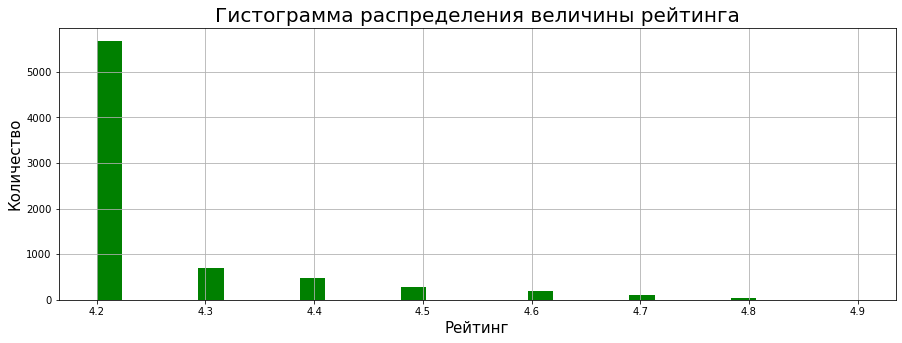

In [28]:
plt.figure(figsize = (15,5))

plt.title('Гистограмма распределения величины рейтинга', fontsize = 20, color = 'black')
plt.xlabel("Рейтинг", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')
plt.grid()
plt.hist(df['rating'], 30, color = 'green');

In [29]:
import math 

number_sample = df['rating'].value_counts().to_numpy() # Частота каждого рейтинга
all_number = 7500 # Все наблюдения 
probabilities = np.array([0.7, 0.1, 0.07, 0.05, 0.03, 0.025, 0.0225, 0.0025])

print('p-value =',sts.chisquare(number_sample, f_exp = all_number*probabilities)[1])

p-value = 3.7550213101741026e-41


p-value слишком мало, поэтому мы отвергаем гипотезу.


### Корреляции 

In [30]:
df.corr()

,year,rating,num_reviews,price,body,acidity,N/S
year,1.000000,-0.294618,0.022906,-0.383561,-0.110842,0.155449,-0.096351
rating,-0.294618,1.000000,0.015229,0.545039,0.166637,-0.098896,0.061640
num_reviews,0.022906,0.015229,1.000000,-0.030039,0.059850,0.039208,0.040747
price,-0.383561,0.545039,-0.030039,1.000000,0.161151,-0.039692,0.101416
body,-0.110842,0.166637,0.059850,0.161151,1.000000,-0.026806,0.228632
acidity,0.155449,-0.098896,0.039208,-0.039692,-0.026806,1.000000,0.010539
N/S,-0.096351,0.061640,0.040747,0.101416,0.228632,0.010539,1.000000


Наиболее интересным при рассмотрении корреляций является корреляция цены вина с прочими признаками (хотелось бы, конечно, посмотреть на значимость таких оценок корреляций, однако этого на матстате мы ещё не проходили). Можно сделать вывод, что цена больше всего положительно коррелирует с рейтингом, что кажется довольно логичным. Полнота вина также положительно влияет на цену, однако это влияние довольно небольшое. Забавно то, что цена отрицательно коррелирует с годом сбора урожая. То есть старость вина по какой-то причине отрицательно влияет на цену, это необычно. 

### Доверительные интервалы

#### Везде будет использоваться уровень значимости равный 5%.

##### Доверительный интервал для математического ожидания стоимости вина (дисперсия неизвестна)

Было использовано нормальное распределение, так как у нас 7500 наблюдений, а значит применима асимптотика.

In [31]:
def Mu_interval_std(viborka_new):   # Функция для нахождения асимптотического д.и. для мат. ожидания с неизвестной дисперсией  
    kvantil = sts.norm.ppf(1-0.025)    
    niz_new = viborka_new.mean() - kvantil * (viborka_new.std()/(len(viborka_new)**0.5))
    verh_new = viborka_new.mean() + kvantil * (viborka_new.std()/(len(viborka_new)**0.5)) 
    return (niz_new, verh_new)
def Disp_unknown_E( sample): # Функция для нахождения д.и. для дисперсии с неизвестным мат. ожиданием
    hkvadrat_niz = sts.chi2.ppf(1-.025, df = len(sample)-1)
    hkvadrat_verh = sts.chi2.ppf(1-0.975, df = len(sample)-1)
    niz_disp_un = sum((sample - sample.mean())**2) / hkvadrat_niz
    verh_disp_un = sum((sample - sample.mean())**2) / hkvadrat_verh
    return(niz_disp_un, verh_disp_un)

In [32]:
print('Математическое ожидание стоимости вина находится в следующем интервале:', Mu_interval_std(df['price']))

Математическое ожидание стоимости вина находится в следующем интервале: (56.08635321804969, 62.894713448616976)


##### Доверительный интервал для математического ожидания  количества отзывов (дисперсия неизвестна)

Было использовано нормальное распределение, так как у нас 7500 наблюдений, а значит применима асимптотика.

In [33]:
print('Математическое ожидание количества отзывов на вино находится в следующем интервале:', Mu_interval_std(df['num_reviews']))

Математическое ожидание количества отзывов на вино находится в следующем интервале: (434.7462949430354, 467.4718383902979)


##### Доверительный интервал для дисперсии стоимости вина  (математическое ожидание неизвестно, взяты вина до 100 евро)

Было использовано нормальное распределение, так как у нас 7500 наблюдений, а значит применима асимптотика.

In [34]:
print('Дисперсия стоимости вина (взяты вина до 100 евро) находится в следующем интервале:',
      Disp_unknown_E(df[df['price'] <= 100]['price'])) # =_= Опупеть дисперсия

Дисперсия стоимости вина (взяты вина до 100 евро) находится в следующем интервале: (413.19210185873885, 441.5810316939918)


##### Доверительный интервал для дисперсии  количества отзывов (математические ожидание неизвестно)

Было использовано нормальное распределение, так как у нас 7500 наблюдений, а значит применима асимптотика.

In [35]:
print('Дисперсия количества отзывов находится в следующем интервале:', 
      Disp_unknown_E(df['num_reviews'])) # Опупесть дисперсия

Дисперсия количества отзывов находится в следующем интервале: (506395.3371620682, 539875.350168784)


## Часть 5. Машинное обучение

В данном разделе мы будем предсказывать значение цены вина в зависимости от числовых параметров (рейтинг, количество отзывов, насыщенность, кислотность и расположение регионов (новый признак N/S)). Главная цель данного предсказания - понять, как числовые параметры датасета влияют на изменение цены вина. Мы будем решать задачу регресии (линейная регрессия, метод ближайших соседей, метод случайного леса).

Что же касается метрики, то мы будем использовать MAPE с целью понять именно процетное различие наших прогнозных и фактических значений цены вина.

## 1. Разбиение выборки на обучающую и тестовую

In [36]:
# Мы будем предсказывать цену вина в зависимости от числовых параметров, 
# поэтому давайте удалим лишние колонки из датасета

df_1 = df.drop(columns=['winery', 'wine', 'region', 'type', 'year'])

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# разделим на обучающую и тестовую выборку в пропорции 80/20
df_train, df_test = train_test_split(df_1, test_size = 0.2, random_state = 42)

In [38]:
y_train = df_train['price'].to_numpy()
y_test = df_test['price'].to_numpy()

X_train = df_train.drop('price', axis=1).to_numpy()
X_test = df_test.drop('price', axis=1).to_numpy()

## 2. Обучаем модель

### 2.1 Наивный прогноз

In [39]:
y_mean = np.mean(y_train)                     # посчитали среднее по значениям цены вин
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали значения цен

In [40]:
print(f'MAPE:', mean_absolute_percentage_error(y_test, y_pred_naive))

MAPE: 1.4470731531529972


Рассчитав среднюю абсолютную процентную ошибку, можно увидеть, что она составила целых 144.7%. Это говорит о том, что средняя разница между прогнозируемым значением цены вина и фактическим значением цены вина очень велика. Попробуем получить более низкую MAPE.

### 2.2. Линейная регрессия

Будем обучать модель линейной регресии и предсказывать цену вина в зависимости от количества отзывов, рейтинга, насыщенности и кислотности.

In [41]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
 
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [42]:
print(f'MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.9547172305493395


После обучения модели линейное регресии можем увидеть, что MAPE снизилась до 95.47%, что все еще достаточно велико.
Но это в целом говорит о том, что линейная регрессия в среднем предсказывает лучше, чем метод наивного прогноза.

In [43]:
print(lin_reg.intercept_)
print(*lin_reg.coef_)

-2876.0436708590328
665.2053261647877 -0.008624708494440567 16.77655210115825 7.52291772362035 21.018089712719412


Получившееся уравнение линейной регрессии выглядит следующим образом: Price = -2876.044 + 665.205 * Rating - 0.009 * Num_Reviews + 16.776 * Body + 7.523 * Acidity + 21.02 * North/South

### 2.3. Метод k-ближайших соседей

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5) # возьмем количество ближайших соседей равным 5 по умолчанию

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

Ссылка на источник, опираясь на который мы взяли число ближайших соседей равным 5: https://proglib.io/p/metod-k-blizhayshih-sosedey-k-nearest-neighbour-2021-07-19. Говоря вкратце, количество соседей, равное 1 или 2, могут способствовать недообучению модели, а слишком высокие значения повышают риск переобучения модели.

In [45]:
print(f'MAPE:', mean_absolute_percentage_error(y_test, y_pred_knn))

MAPE: 0.6374226088696894


В данной модели средняя абсолютная процентная ошибка снизилась до 63.74%. Хорошо ли это? Однозначно сказать нельзя, поскольку при изменении количества ближайших соседей MAPE может как вырасти, так и упасть. Однако можно сказать, что в среднем данная модель предсказывает лучше линейной регресии, и различия прогнозных значений цены вина и фактических сократились.

### 2.4. Случайный лес

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
forest = RandomForestRegressor(n_estimators=100, random_state=42) # значения числа деревьев взяли 100 по умолчанию

In [48]:
forest.fit(X_train, y_train)
f_pred = forest.predict(X_test)

In [49]:
print(f'MAPE:', mean_absolute_percentage_error(y_test, f_pred))

MAPE: 0.4020618230439022


Как мы видим, при использовании метода случайного леса MAPE составила около 40.21%. 

### Выводы по машинному обучению: 
Построив несколько моделей и обучив их, мы пришли к выводу, что предсказания, имеющие наименьшую среднюю абсолютную процентную ошибку = 40.21%, получились при построении алгоритма случайного леса для задачи регресии. 

Другие обученные модели предсказывают цены на вина в зависимости от указанных нами параметров (количества отзывов, рейтинга, насыщенности, кислотности и расположения регионов) значительно хуже и менее точно.